In [1]:
import pykx as kx
import kxqueries as kxq

In [4]:
import os
os.getcwd()

'/home/ubuntu/tipy/database'

In [5]:
db = kx.DB(path='database')

In [6]:
db.tables

['ees_run',
 'ees_run_context',
 'ees_sensor_data',
 'ees_sensor_lookup',
 'ees_tool_lookup']

In [7]:
tools = db.ees_tool_lookup.select()

In [8]:
tools.head()

,tool_id,tool_name,run_id,seq_no,db_seq_no,start_time,parent_tool_id,driver_type,tool_type,proc_type_id,proc_type_name,module_id,module_name,state_model_id,state_model_name,descr,imp_run_id,imp_start_time,state,src_url,sys_time
,,,,,,,,,,,,,,,,,,,,,
0,7098i,KX_EL11,1i,4,4,2017.05.24D11:07:23.000000000,0i,1h,,6680i,DefaultPt,10157i,MainModule,,,"""EL11""",-214783647i,0Np,0Ni,,2025.05.28D01:22:01.504312489
1,7100i,KX_PRODUCERGT18,2i,1,1,2017.05.24D13:07:17.000000000,0i,1h,,6680i,DefaultPt,10160i,MainModule,,,"""PRODUCERGT18""",-214783647i,0Np,0Ni,,2025.05.28D01:22:01.504312489
2,5351i,OPPRAN8600_G1,0i,0,0,0Np,5343i,0h,,5133i,TDD PRODUCER_XP_CVD Staircase,5389i,G1,1ee488d9-331a-48b6-b481-0111370f8be9,Default_CSP_State_Model,"""PrecisionXP""",-0Wi,0Np,0Ni,,2025.05.28D01:22:01.504312489
3,5346i,OPPRAN8600_F2,0i,0,0,0Np,5343i,0h,,5133i,TDD PRODUCER_XP_CVD Staircase,5395i,F2,1ee488d9-331a-48b6-b481-0111370f8be9,Default_CSP_State_Model,"""PrecisionXP""",-0Wi,0Np,0Ni,,2025.05.28D01:22:01.504312489
4,5418i,ETCH-DTC_LAB16_CENTRIS_D2,302i,0,0,2017.05.19D11:27:53.000000000,5055i,0h,,5127i,DTC_CENTRIS_CGA_ETCH_AxiSWLL,5479i,D2,1ee488d9-331a-48b6-b481-0111370f8be9,Default_CSP_State_Model,"""""",-0Wi,0Np,0Ni,,2025.05.28D01:22:01.504312489


In [9]:
tools.pd()[tools.pd()['tool_name'].str.contains('KXTest')]

,tool_id,tool_name,run_id,seq_no,db_seq_no,start_time,parent_tool_id,driver_type,tool_type,proc_type_id,...,module_id,module_name,state_model_id,state_model_name,descr,imp_run_id,imp_start_time,state,src_url,sys_time
634,7138,KXTest_PRODUCERGT18,14,9,9,2017-05-25 09:59:16.955,0,1,,6680,...,10194,MainModule,,,b'PRODUCERGT18',-2147483647,NaT,-2147483648,,2025-05-28 01:22:01.504312489
635,7144,KXTest_PRODUCERGT18_CHC_2_1,39,6,6,2017-05-25 11:11:08.158,7138,1,,6993,...,10200,CHC_2_1,,,b'CChGeronimoBase::CChGeronimoAPF;2;1;AT/HRTS/...,-2147483647,NaT,-2147483648,,2025-05-28 01:22:01.504312489
636,7145,KXTest_PRODUCERGT18_LL_1_1,69,18,18,2017-05-25 11:14:11.130,7138,1,,6994,...,10201,LL_1_1,,,b'CChStackedLLBase::CChStackedLL;1;1;AT/LL',-2147483647,NaT,-2147483648,,2025-05-28 01:22:01.504312489
637,7146,KXTest_PRODUCERGT18_LL_1_2,78,17,17,2017-05-25 11:14:11.130,7138,1,,6995,...,10202,LL_1_2,,,b'CChStackedLLBase::CChStackedLL;1;2;AT/LL',-2147483647,NaT,-2147483648,,2025-05-28 01:22:01.504312489
638,7157,KXTest_PRODUCERGT18_COOL_STN_9_1,14,1,1,2017-05-25 09:59:16.000,7138,1,,7006,...,10213,COOL_STN_9_1,,,b'CChFiCoolStn;9;1;AT/COOL_STN',-2147483647,NaT,-2147483648,,2025-05-28 01:22:01.504312489
639,7147,KXTest_PRODUCERGT18_LL_2_1,44,11,11,2017-05-25 11:16:11.307,7138,1,,6996,...,10203,LL_2_1,,,b'CChStackedLLBase::CChStackedLL;2;1;AT/LL',-2147483647,NaT,-2147483648,,2025-05-28 01:22:01.504312489
640,7158,KXTest_PRODUCERGT18_Aligner_1_1,83,24,24,2017-05-25 11:13:38.757,7138,1,,7007,...,10214,Aligner_1_1,,,b'CRDMChFiAligner;1;1;AT/Aligner',-2147483647,NaT,-2147483648,,2025-05-28 01:22:01.504312489
641,7148,KXTest_PRODUCERGT18_LL_2_2,52,11,11,2017-05-25 11:16:11.307,7138,1,,6997,...,10204,LL_2_2,,,b'CChStackedLLBase::CChStackedLL;2;2;AT/LL',-2147483647,NaT,-2147483648,,2025-05-28 01:22:01.504312489
642,7149,KXTest_PRODUCERGT18_COOL_STN_1_1,38,12,12,2017-05-25 11:17:22.989,7138,1,,6998,...,10205,COOL_STN_1_1,,,b'CChFiCoolStn;1;1;AT/COOL_STN',-2147483647,NaT,-2147483648,,2025-05-28 01:22:01.504312489
643,7150,KXTest_PRODUCERGT18_COOL_STN_2_1,14,1,1,2017-05-25 09:59:16.000,7138,1,,6999,...,10206,COOL_STN_2_1,,,b'CChFiCoolStn;2;1;AT/COOL_STN',-2147483647,NaT,-2147483648,,2025-05-28 01:22:01.504312489


In [10]:
tools = tools.pd()[tools.pd()['tool_name'].str.contains('KXTest')]
tools[tools['tool_id'] == 7139]['parent_tool_id']

646    7138
Name: parent_tool_id, dtype: int32

In [11]:
data = db.ees_tool_lookup.select(columns= [kx.Column('tool_id'), kx.Column('run_id')] ,where=kx.Column('parent_tool_id') == 7138).pd()

In [12]:
data

,tool_id,run_id
0,7144,39
1,7145,69
2,7146,78
3,7157,14
4,7147,44
5,7158,83
6,7148,52
7,7149,38
8,7150,14
9,7151,14


In [13]:
d = kxq.samples()

In [14]:
end_time = kxq.kx_dt('2025.06.02')

In [15]:
print(kx.q('meta ees_sensor_data'))

c          | t f a
-----------| -----
date       | d    
ts_id      | j   p
tool_id    | i   p
sensor_id  | i    
is_dst     | b    
min_time   | p    
max_time   | p    
time_stamps| P    
data_float | F    
data_long  | J    
data_str   | C    
sys_time   | p    


In [16]:
print(kx.q(f'select count i by tool_id from ees_sensor_data'))

tool_id| x     
-------| ------
7139   | 198744
7140   | 147498
7141   | 577731
7142   | 577304


In [17]:
print(kx.q(f'select from ees_sensor_data where tool_id = 7139').shape)

(pykx.LongAtom(pykx.q('198744')), pykx.LongAtom(pykx.q('12')))


In [18]:
db.tables

['ees_run',
 'ees_run_context',
 'ees_sensor_data',
 'ees_sensor_lookup',
 'ees_tool_lookup']

In [19]:
kx.q(f'select from ees_sensor_data where tool_id=7139')

,date,ts_id,tool_id,sensor_id,is_dst,min_time,max_time,time_stamps,data_float,data_long,data_str,sys_time
,,,,,,,,,,,,
0,2025.05.30,30661773920729,7139i,2394585i,0b,2025.05.30D10:22:17.914000000,2025.05.30D10:26:27.363000000,2025.05.30D10:22:17.914000000 2025.05.30D10:26:08.717000000 2025.05.30D10:26:..,`float$(),0 12 13 14 0,"""""",2025.05.30D04:20:31.591984847
1,2025.05.30,30661773920729,7139i,2394585i,0b,2025.05.30D10:36:27.272000000,2025.05.30D10:36:27.798000000,2025.05.30D10:36:27.272000000 2025.05.30D10:36:27.275000000 2025.05.30D10:36:..,`float$(),-1 0 1,"""""",2025.05.30D04:21:01.682582647
2,2025.05.30,30661773920729,7139i,2394585i,0b,2025.05.30D10:36:37.216000000,2025.05.30D10:37:27.224000000,2025.05.30D10:36:37.216000000 2025.05.30D10:36:52.218000000 2025.05.30D10:37:..,`float$(),2 3 4 5 6,"""""",2025.05.30D04:21:01.682582647
3,2025.05.30,30661773920729,7139i,2394585i,0b,2025.05.30D10:36:27.271000000,2025.05.30D10:37:27.224000000,2025.05.30D10:36:27.271000000 2025.05.30D10:36:52.218000000 2025.05.30D10:37:..,`float$(),6 3 4 5 6,"""""",2025.05.30D04:21:01.682582647
4,2025.05.30,30661773920729,7139i,2394585i,0b,2025.05.30D11:09:47.660000000,2025.05.30D11:10:47.943000000,2025.05.30D11:09:47.660000000 2025.05.30D11:09:53.443000000 2025.05.30D11:10:..,`float$(),1 2 3 4 5 6,"""""",2025.05.30D04:21:31.648965857
5,2025.05.30,30661773920729,7139i,2394585i,0b,2025.05.30D11:14:31.087000000,2025.05.30D11:15:32.575000000,2025.05.30D11:14:31.087000000 2025.05.30D11:14:31.091000000 2025.05.30D11:14:..,`float$(),-1 0 1 2 3 4 5 6 7 8 0,"""""",2025.05.30D04:22:31.590866214
6,2025.05.30,30661773920729,7139i,2394585i,0b,2025.05.30D11:16:41.744000000,2025.05.30D11:17:07.030000000,2025.05.30D11:16:41.744000000 2025.05.30D11:16:41.748000000 2025.05.30D11:16:..,`float$(),-1 0 1 2 3 4 5,"""""",2025.05.30D04:23:31.594257999
7,2025.05.30,30661773920729,7139i,2394585i,0b,2025.05.30D11:16:41.743000000,2025.05.30D11:17:07.030000000,2025.05.30D11:16:41.743000000 2025.05.30D11:16:51.581000000 2025.05.30D11:16:..,`float$(),5 2 3 4 5,"""""",2025.05.30D04:23:31.594257999
8,2025.05.30,30661773920729,7139i,2394585i,0b,2025.05.30D10:22:17.914000000,2025.05.30D10:26:27.363000000,2025.05.30D10:22:17.914000000 2025.05.30D10:26:08.717000000 2025.05.30D10:26:..,`float$(),0 12 13 14 0,"""""",2025.05.30D04:44:31.591000589


In [20]:
tool_id = 7139
run_id = 1583633

In [21]:
output = kxq.get_sensor_data(tool_id = tool_id, run_id = run_id, start_time = d.start_time, end_time = end_time)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pandas as pd

In [23]:
df = output[0].pd()

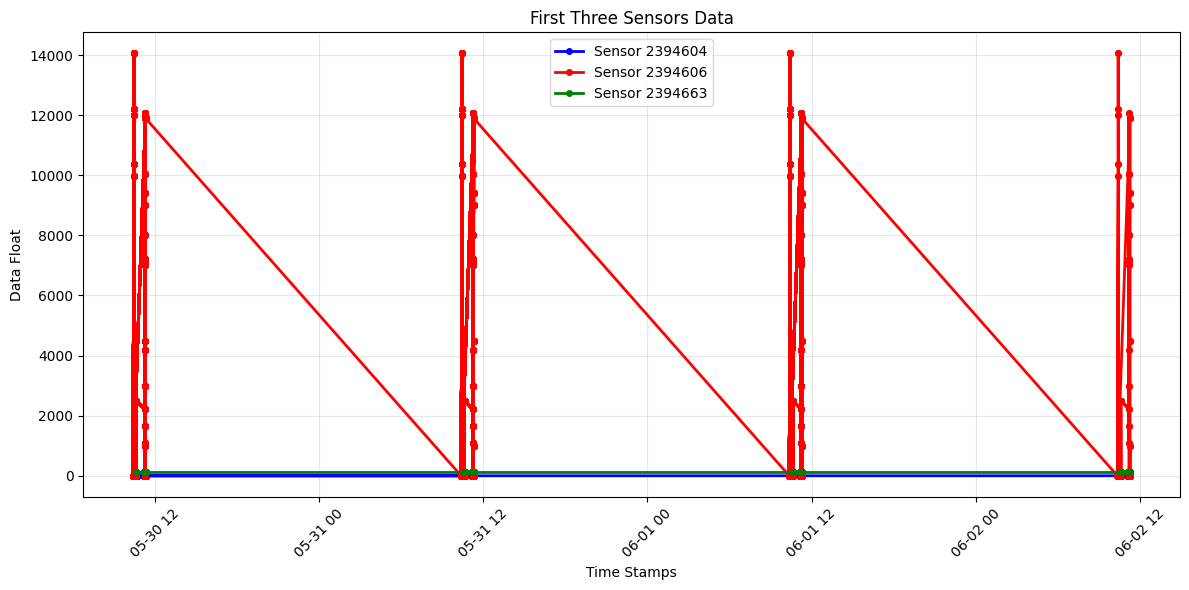

In [24]:
first_three_sensors = df['sensor_name'].unique()[:3]
df_filtered = df[df['sensor_name'].isin(first_three_sensors)]


plt.figure(figsize=(12, 6))

# Plot each of the three sensors
colors = ['blue', 'red', 'green']
for i, sensor in enumerate(first_three_sensors):
    sensor_data = df_filtered[df_filtered['sensor_name'] == sensor]
    plt.plot(sensor_data['time_stamps'], sensor_data['data_float'], 
             label=f'Sensor {sensor}', marker='o', markersize=4, 
             linewidth=2, color=colors[i])

# Customize the plot
plt.xlabel('Time Stamps')
plt.ylabel('Data Float')
plt.title('First Three Sensors Data')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()